# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# ignor warinigs
import warnings
warnings.filterwarnings("ignore")

# Glimpse Dataset

In [3]:
#  on_bad_lines="skip" tells Pandas to skip lines that it cannot parse properly and continue reading the file
csv_file = "/Users/mengyuanwang/Desktop/NLP_projecs/Book_recommender_statistical_search_engine/books.csv"
df = pd.read_csv(csv_file, on_bad_lines="skip")
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
df.shape

(11123, 12)

## get the basic information of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


### column types

- **Numerical** - bookID, average_rating, isbn13, num_pages, ratings_count, text_reviews_count
- **Categorical** - There is not genre types of books.
- **Text-based data** - title, authors, language_code, publisher

## unique values (Book)

In [6]:
print("no of unique value:",df['title'].nunique())
print("percent of unique value:",df['title'].nunique()/df.shape[0])

no of unique value: 10348
percent of unique value: 0.9303245527285804


In [7]:
print("no. of null values :",(df['title'].isnull()).sum())
print("percent of null values :",(df['title'].isnull()).sum()/df.shape[0])
print("no. of duplicate values :",df['title'].duplicated().sum())
print("percent  of duplicate values :",df['title'].duplicated().sum()/df.shape[0])

no. of null values : 0
percent of null values : 0.0
no. of duplicate values : 775
percent  of duplicate values : 0.06967544727141958


In [8]:
# check the duplicate rows
if(df.duplicated().sum()):
    print("no of duplicates are :",df.duplicated().sum())
else:
    print("dataset dont have any duplicate")

dataset dont have any duplicate


> although there is duplicate in titles, there is no duplicate rows

In [9]:
Unique_title = pd.unique(df[['title']].values.ravel())
# .values convert the selected column into array
# .ravel() flattens the NumPy array into a 1-dimensional array

print("Number of Unique values: ",df[['title']].nunique())

Value_Unique_title = df[['title']].value_counts()
#.value_counts(): Pandas Series method, returns a Series containing counts of unique values in descending order.

Value_Unique_title.head(10)

Number of Unique values:  title    10348
dtype: int64


title                     
The Iliad                     9
The Brothers Karamazov        9
Anna Karenina                 8
'Salem's Lot                  8
Gulliver's Travels            8
The Odyssey                   8
The Picture of Dorian Gray    7
A Midsummer Night's Dream     7
The Great Gatsby              6
Sense and Sensibility         6
Name: count, dtype: int64

> Some books in the database exist more than once. This is not due to the repetition of the rows of the dataset and is due to the difference in the publications, the year of publication, and the written language of the book. For example, let's examine the first book that has the most repetition.

In [10]:
# check book The Iliad

In [11]:
df.loc[df['title']== "The Iliad"]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
403,1371,The Iliad,Homer/Robert Fagles/Bernard Knox,3.86,0140275363,9780140275360,eng,683,288792,3423,4/29/1999,Penguin Classics
405,1374,The Iliad,Homer/Robert Fitzgerald/Andrew Ford,3.86,0374529051,9780374529055,en-US,588,692,81,4/3/2004,Farrar Straus and Giroux
407,1376,The Iliad,Homer/E.V. Rieu/Peter Jones/D.C.H. Rieu,3.86,0140447946,9780140447941,eng,462,1919,118,1/30/2003,Penguin Classics
408,1377,The Iliad,Homer/W.H.D. Rouse,3.86,0451527372,9780451527370,en-US,312,158,15,8/1/1999,Signet Classics
555,1796,The Iliad,Homer/Robert Fitzgerald,3.86,1857150600,9781857150605,eng,594,30,2,3/19/1992,Everyman
3355,12254,The Iliad,Homer/Robert Fagles/Derek Jacobi,3.86,0143059289,9780143059288,eng,8,42,7,6/15/2006,Penguin-HighBridge
5903,22221,The Iliad,Homer,3.86,0471377589,9780471377580,eng,150,3834,134,10/28/1999,John Wiley & Sons
8534,32780,The Iliad,Homer/Andrew Lang,3.86,1904633382,9781904633389,eng,542,64,8,9/1/2011,Collector's Library
8536,32782,The Iliad,Homer/Victor G. Ambrus/Nick McCarty,3.86,0753453215,9780753453216,eng,95,8,3,9/15/2000,Kingfisher


### plot 20 most repeated books

Text(0.5, 1.0, 'Top 20 Books - Count')

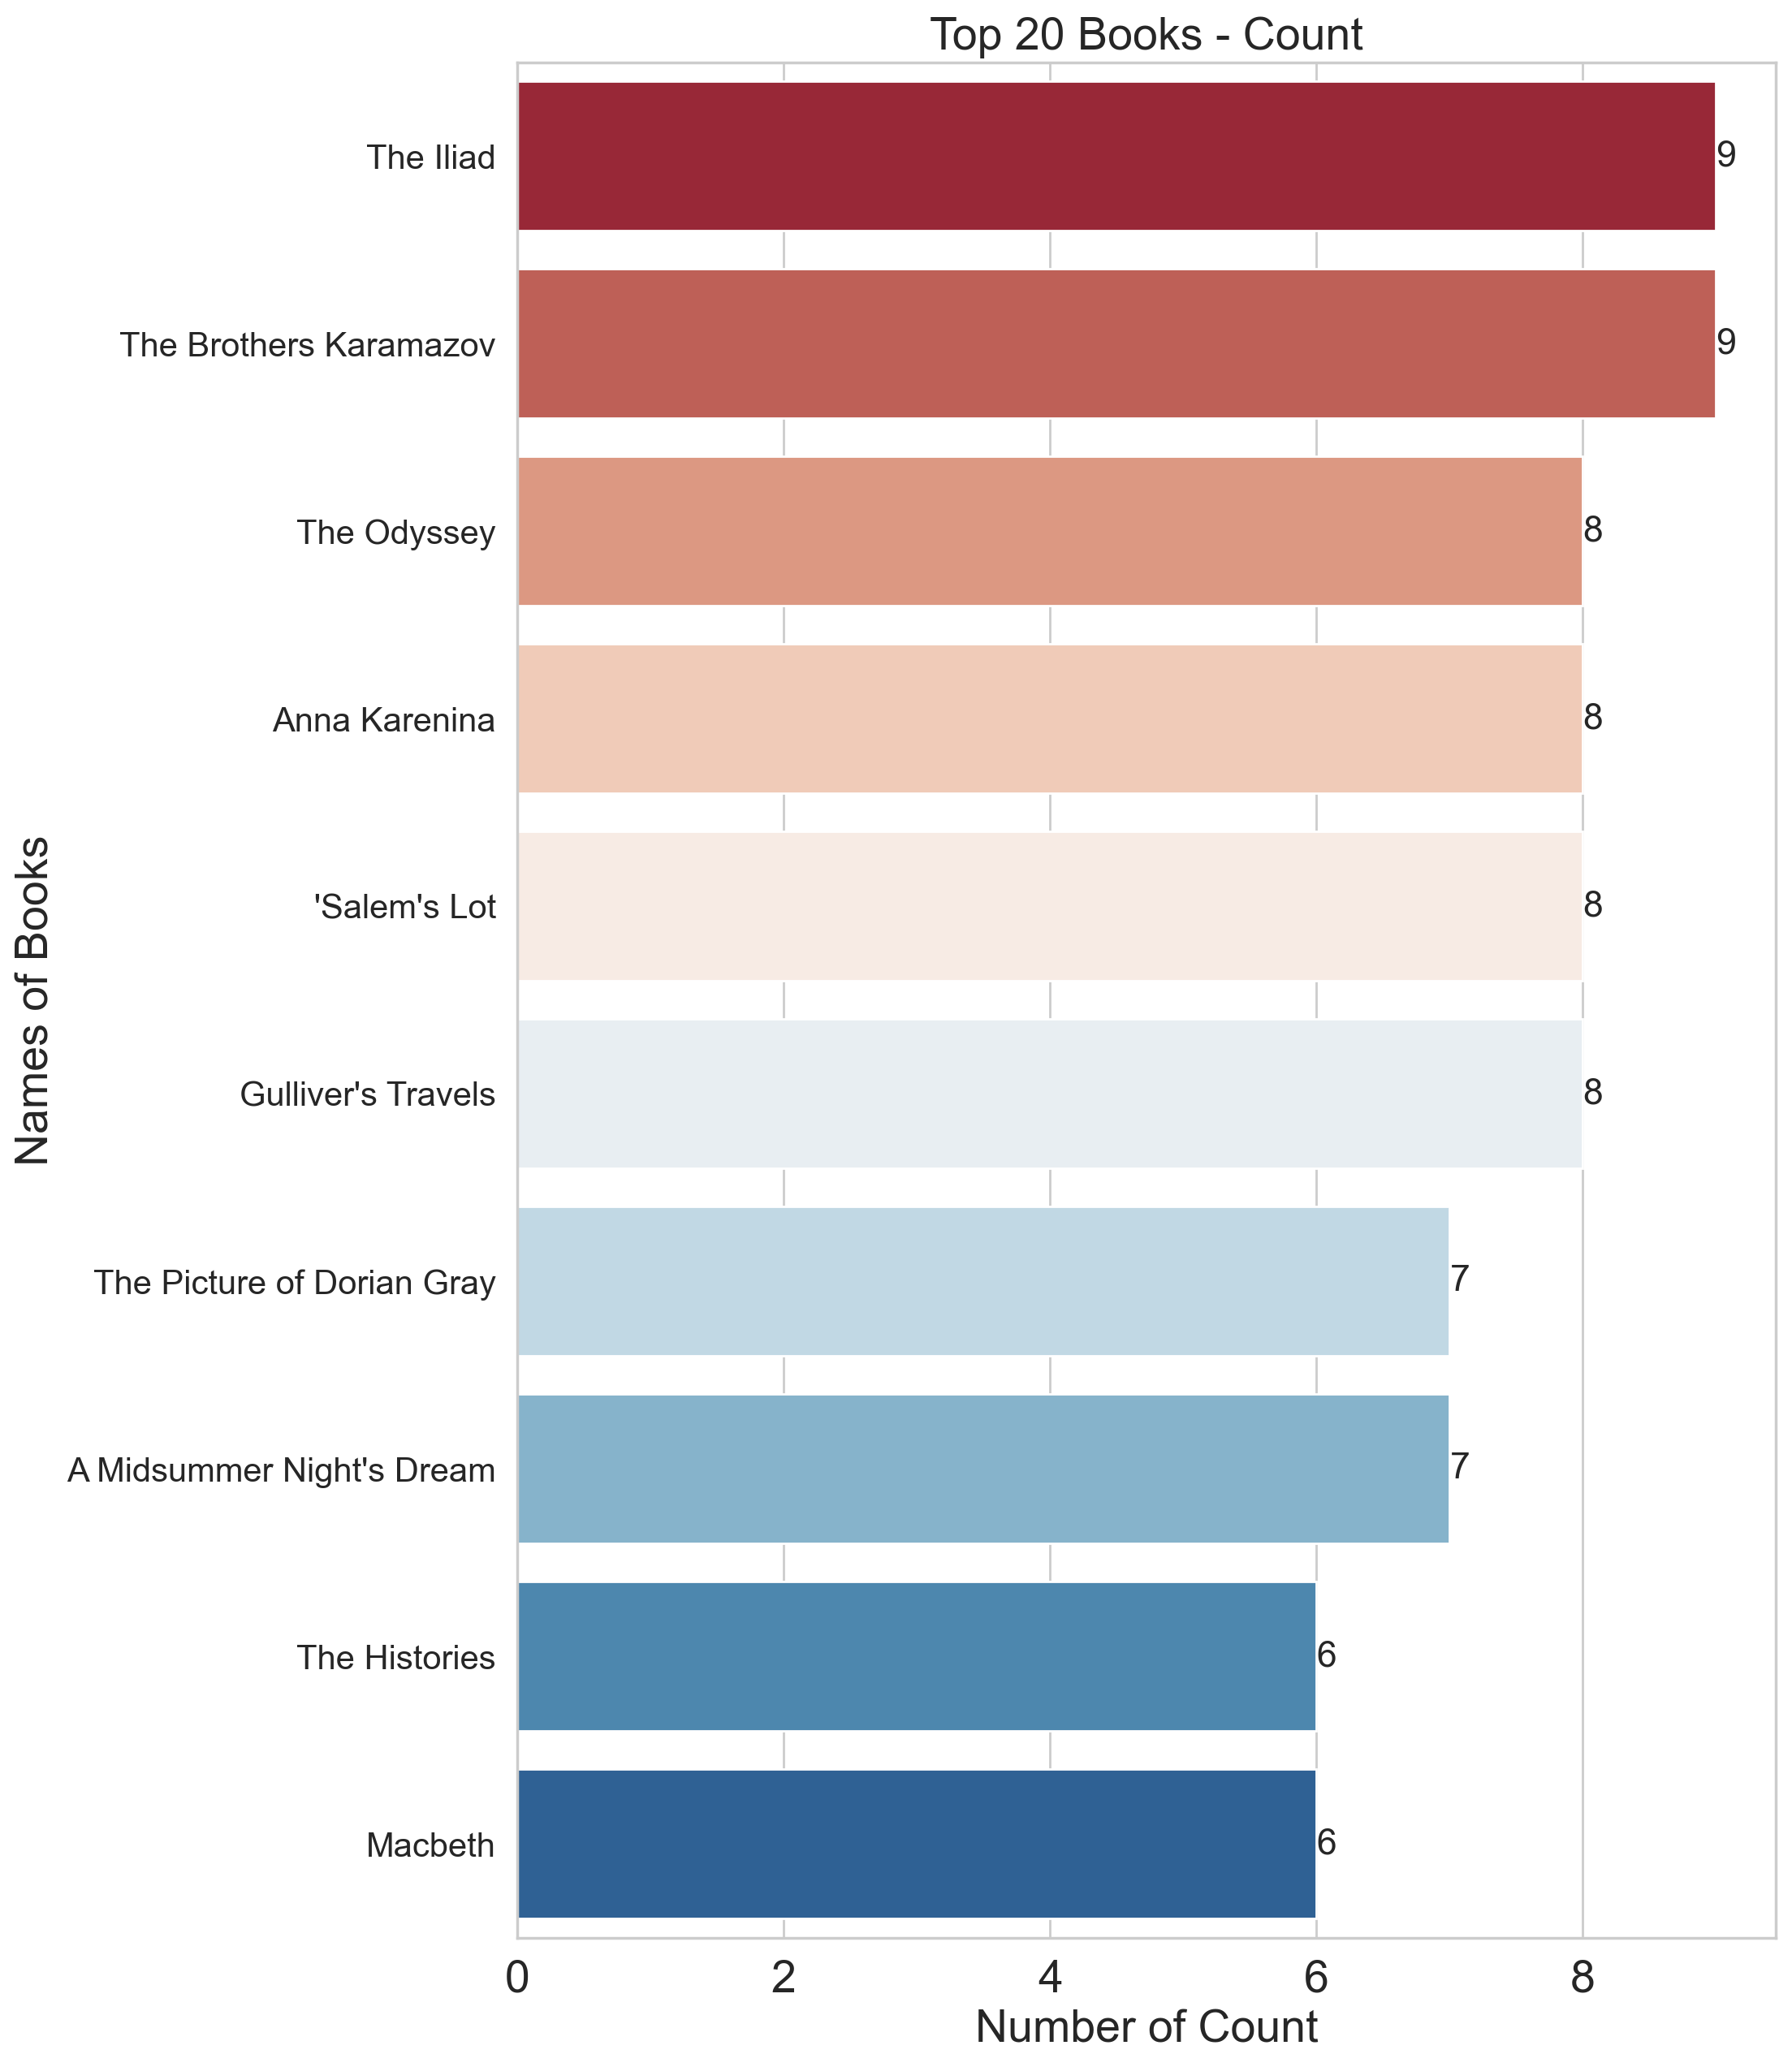

In [12]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(10,15),dpi=200)
Top_20_books = df['title'].value_counts()[:10]
ax = sns.barplot(x= Top_20_books, y= Top_20_books.index, palette="RdBu")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of Books", fontsize=20)
plt.xlabel("Number of Count", fontsize=20)
plt.title("Top 20 Books - Count", fontsize= 20)

## unique values (author)

In [13]:
Unique_authors = pd.unique(df[['authors']].values.ravel())
print("Number of Unique values: ",df[['authors']].nunique())
Value_Unique_authors = df[['authors']].value_counts()
Value_Unique_authors.head(10)

Number of Unique values:  authors    6639
dtype: int64


authors            
Stephen King           40
P.G. Wodehouse         40
Rumiko Takahashi       39
Orson Scott Card       35
Agatha Christie        33
Piers Anthony          30
Mercedes Lackey        29
Sandra Brown           29
Dick Francis           28
Laurell K. Hamilton    23
Name: count, dtype: int64

In [14]:
df.loc[df['authors']== "Stephen King"]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
1459,5094,The Drawing of the Three (The Dark Tower #2),Stephen King,4.23,0451210859,9780451210852,eng,463,173022,5139,8/5/2003,Signet
1574,5415,'Salem's Lot,Stephen King,4.02,0965772411,9780965772419,eng,405,1039,130,10/17/1975,Doubleday
1575,5417,Carrie / 'Salem's Lot / The Shining,Stephen King,4.54,0517219026,9780517219027,eng,1096,13137,61,7/2/2002,Wings
1576,5419,'Salem's Lot,Stephen King,4.02,0451092317,9780451092311,en-US,427,178,35,11/13/1979,Signet
1577,5420,'Salem's Lot,Stephen King,4.02,0340770538,9780340770535,eng,586,25,6,10/6/2010,Hodder & Stoughton Ltd
2843,10566,Lisey's Story,Stephen King,3.68,0743289412,9780743289412,eng,513,59097,2709,10/24/2006,Scribner
2847,10574,The Colorado Kid,Stephen King,3.32,0843955848,9780843955842,eng,178,24611,1970,2/20/2006,Hard Crime Case
2849,10579,Everything's Eventual: 14 Dark Tales,Stephen King,3.97,1416524355,9781416524359,eng,605,73145,1519,11/1/2005,Pocket Books
2851,10583,Pet Sematary,Stephen King,3.98,1416524347,9781416524342,eng,576,257466,3768,11/1/2005,Pocket Books
2859,10603,Cujo,Stephen King,3.71,0307348245,9780307348241,spa,432,197993,2816,6/6/2006,Plaza y Janés


### plot 10 most repeated authors

Text(0.5, 1.0, 'Top 20 authors - Count')

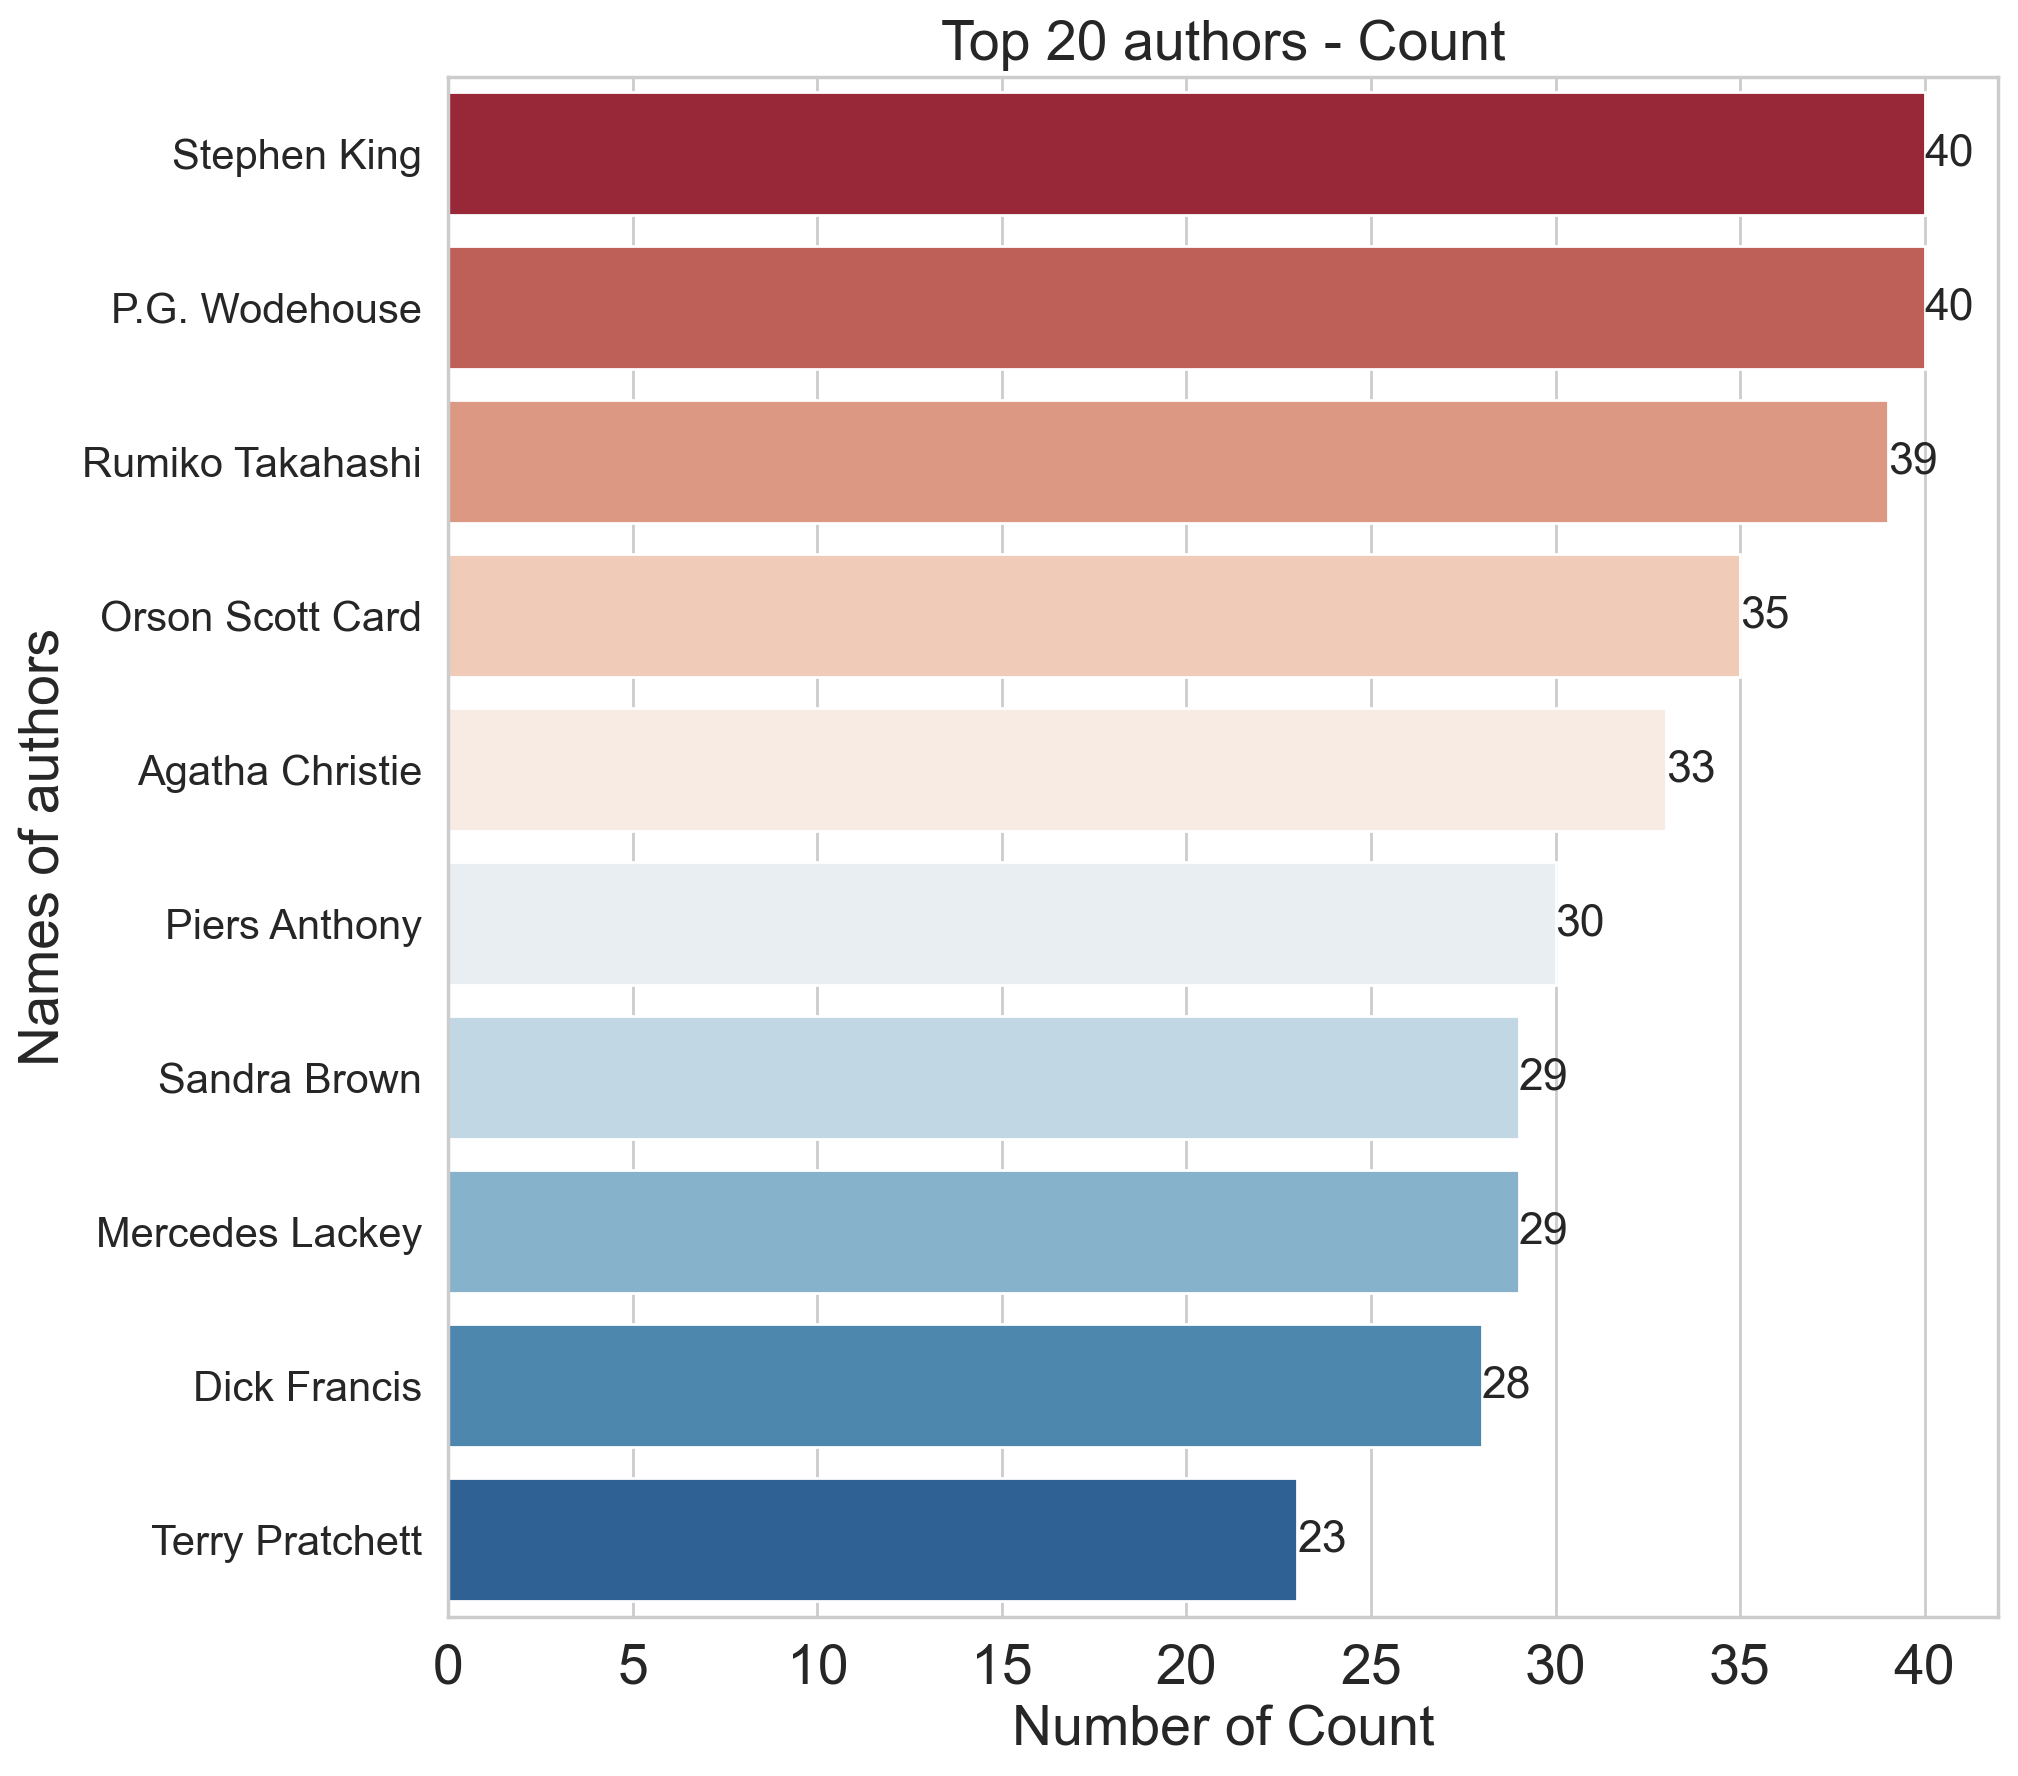

In [15]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(10,10),dpi=200)
Top_20_authors = df['authors'].value_counts()[:10]
ax = sns.barplot(x= Top_20_authors, y= Top_20_authors.index, palette="RdBu")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of authors", fontsize=20)
plt.xlabel("Number of Count", fontsize=20)
plt.title("Top 20 authors - Count", fontsize= 20)

## unique values (publisher)

In [16]:
Unique_publish = pd.unique(df[['publisher']].values.ravel())
print("Number of Unique values: ",df[['publisher']].nunique())
Value_Unique_publish = df[['publisher']].value_counts()
Value_Unique_publish.head(10)

Number of Unique values:  publisher    2290
dtype: int64


publisher       
Vintage             318
Penguin Books       261
Penguin Classics    184
Mariner Books       150
Ballantine Books    144
HarperCollins       112
Harper Perennial    112
Pocket Books        111
Bantam              110
VIZ Media LLC        88
Name: count, dtype: int64

### plot 10 most repeated publisher

Text(0.5, 1.0, 'Top 20 publishers - Count')

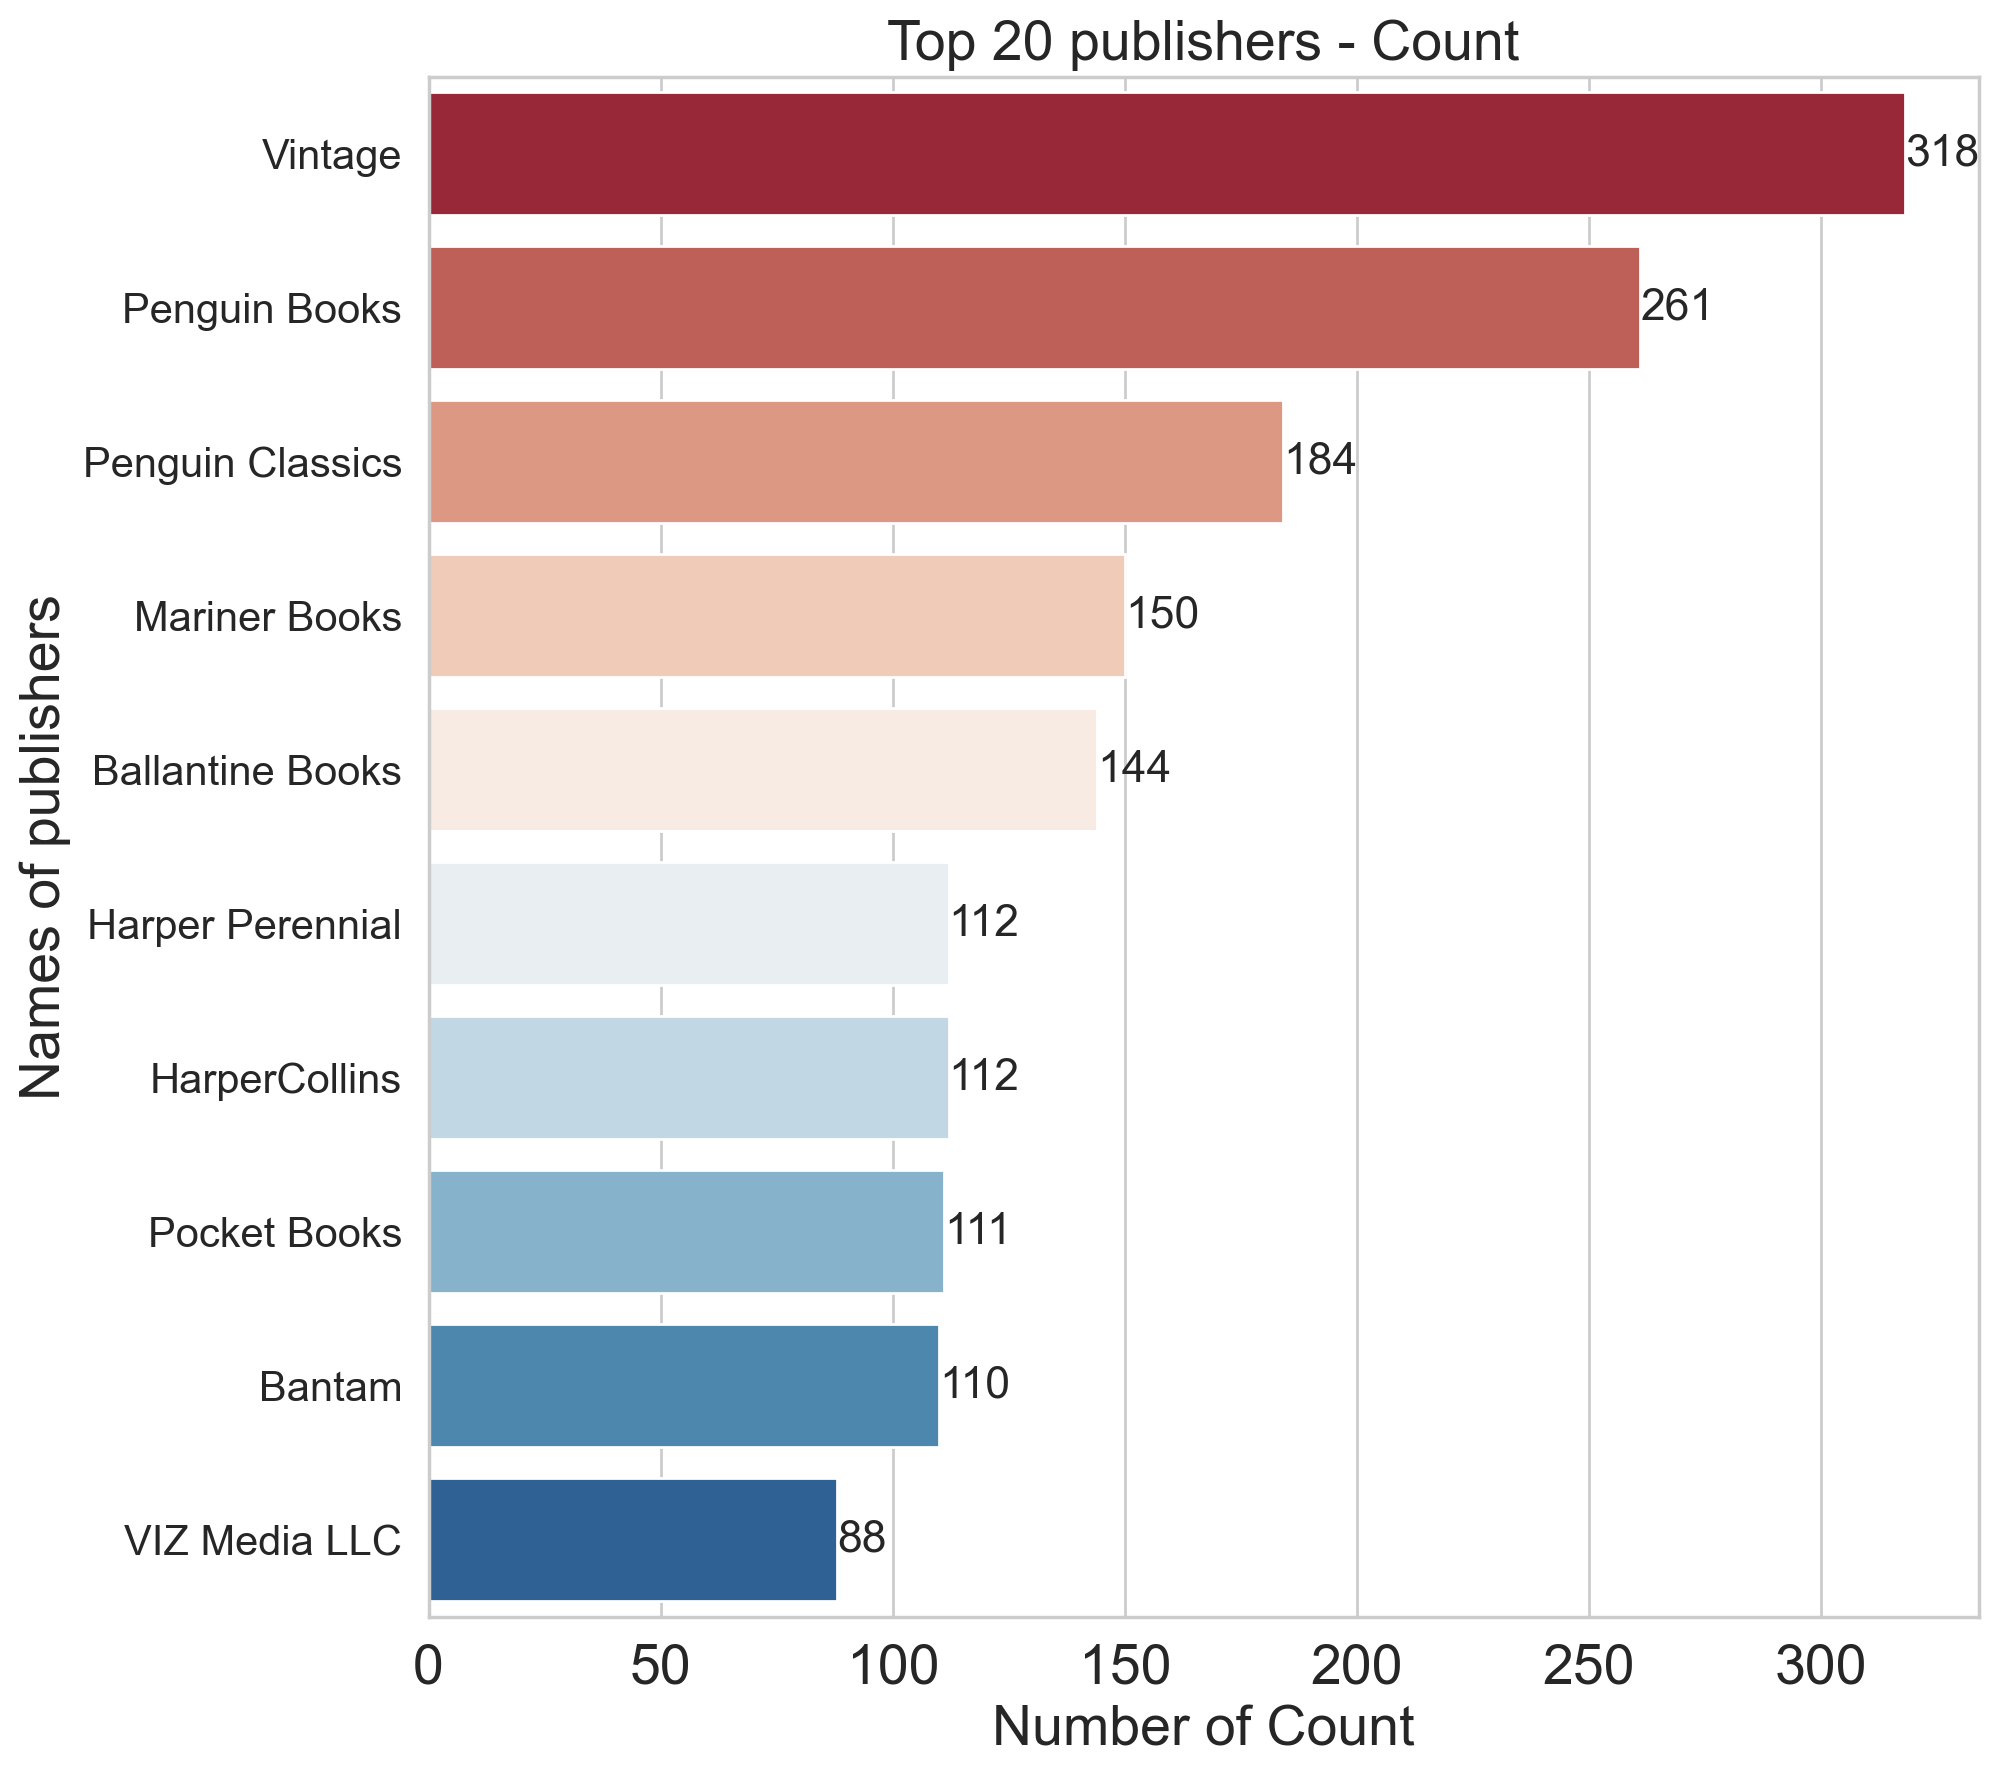

In [17]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(10,10),dpi=200)
Top_20_publish = df['publisher'].value_counts()[:10]
ax = sns.barplot(x= Top_20_publish, y= Top_20_publish.index, palette="RdBu")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of publishers", fontsize=20)
plt.xlabel("Number of Count", fontsize=20)
plt.title("Top 20 publishers - Count", fontsize= 20)

## unique values (langurage_code)

In [18]:
Unique_Lan_Code = pd.unique(df[['language_code']].values.ravel())
print("Number of Unique values: ",df[['language_code']].nunique())
Value_Unique_Lan_Code = df[['language_code']].value_counts()
Value_Unique_Lan_Code.head(10)

Number of Unique values:  language_code    27
dtype: int64


language_code
eng              8908
en-US            1408
spa               218
en-GB             214
fre               144
ger                99
jpn                46
mul                19
zho                14
grc                11
Name: count, dtype: int64

### plot 1o most repeated langurage code

Text(0.5, 1.0, 'Top 20 Language Code - Count')

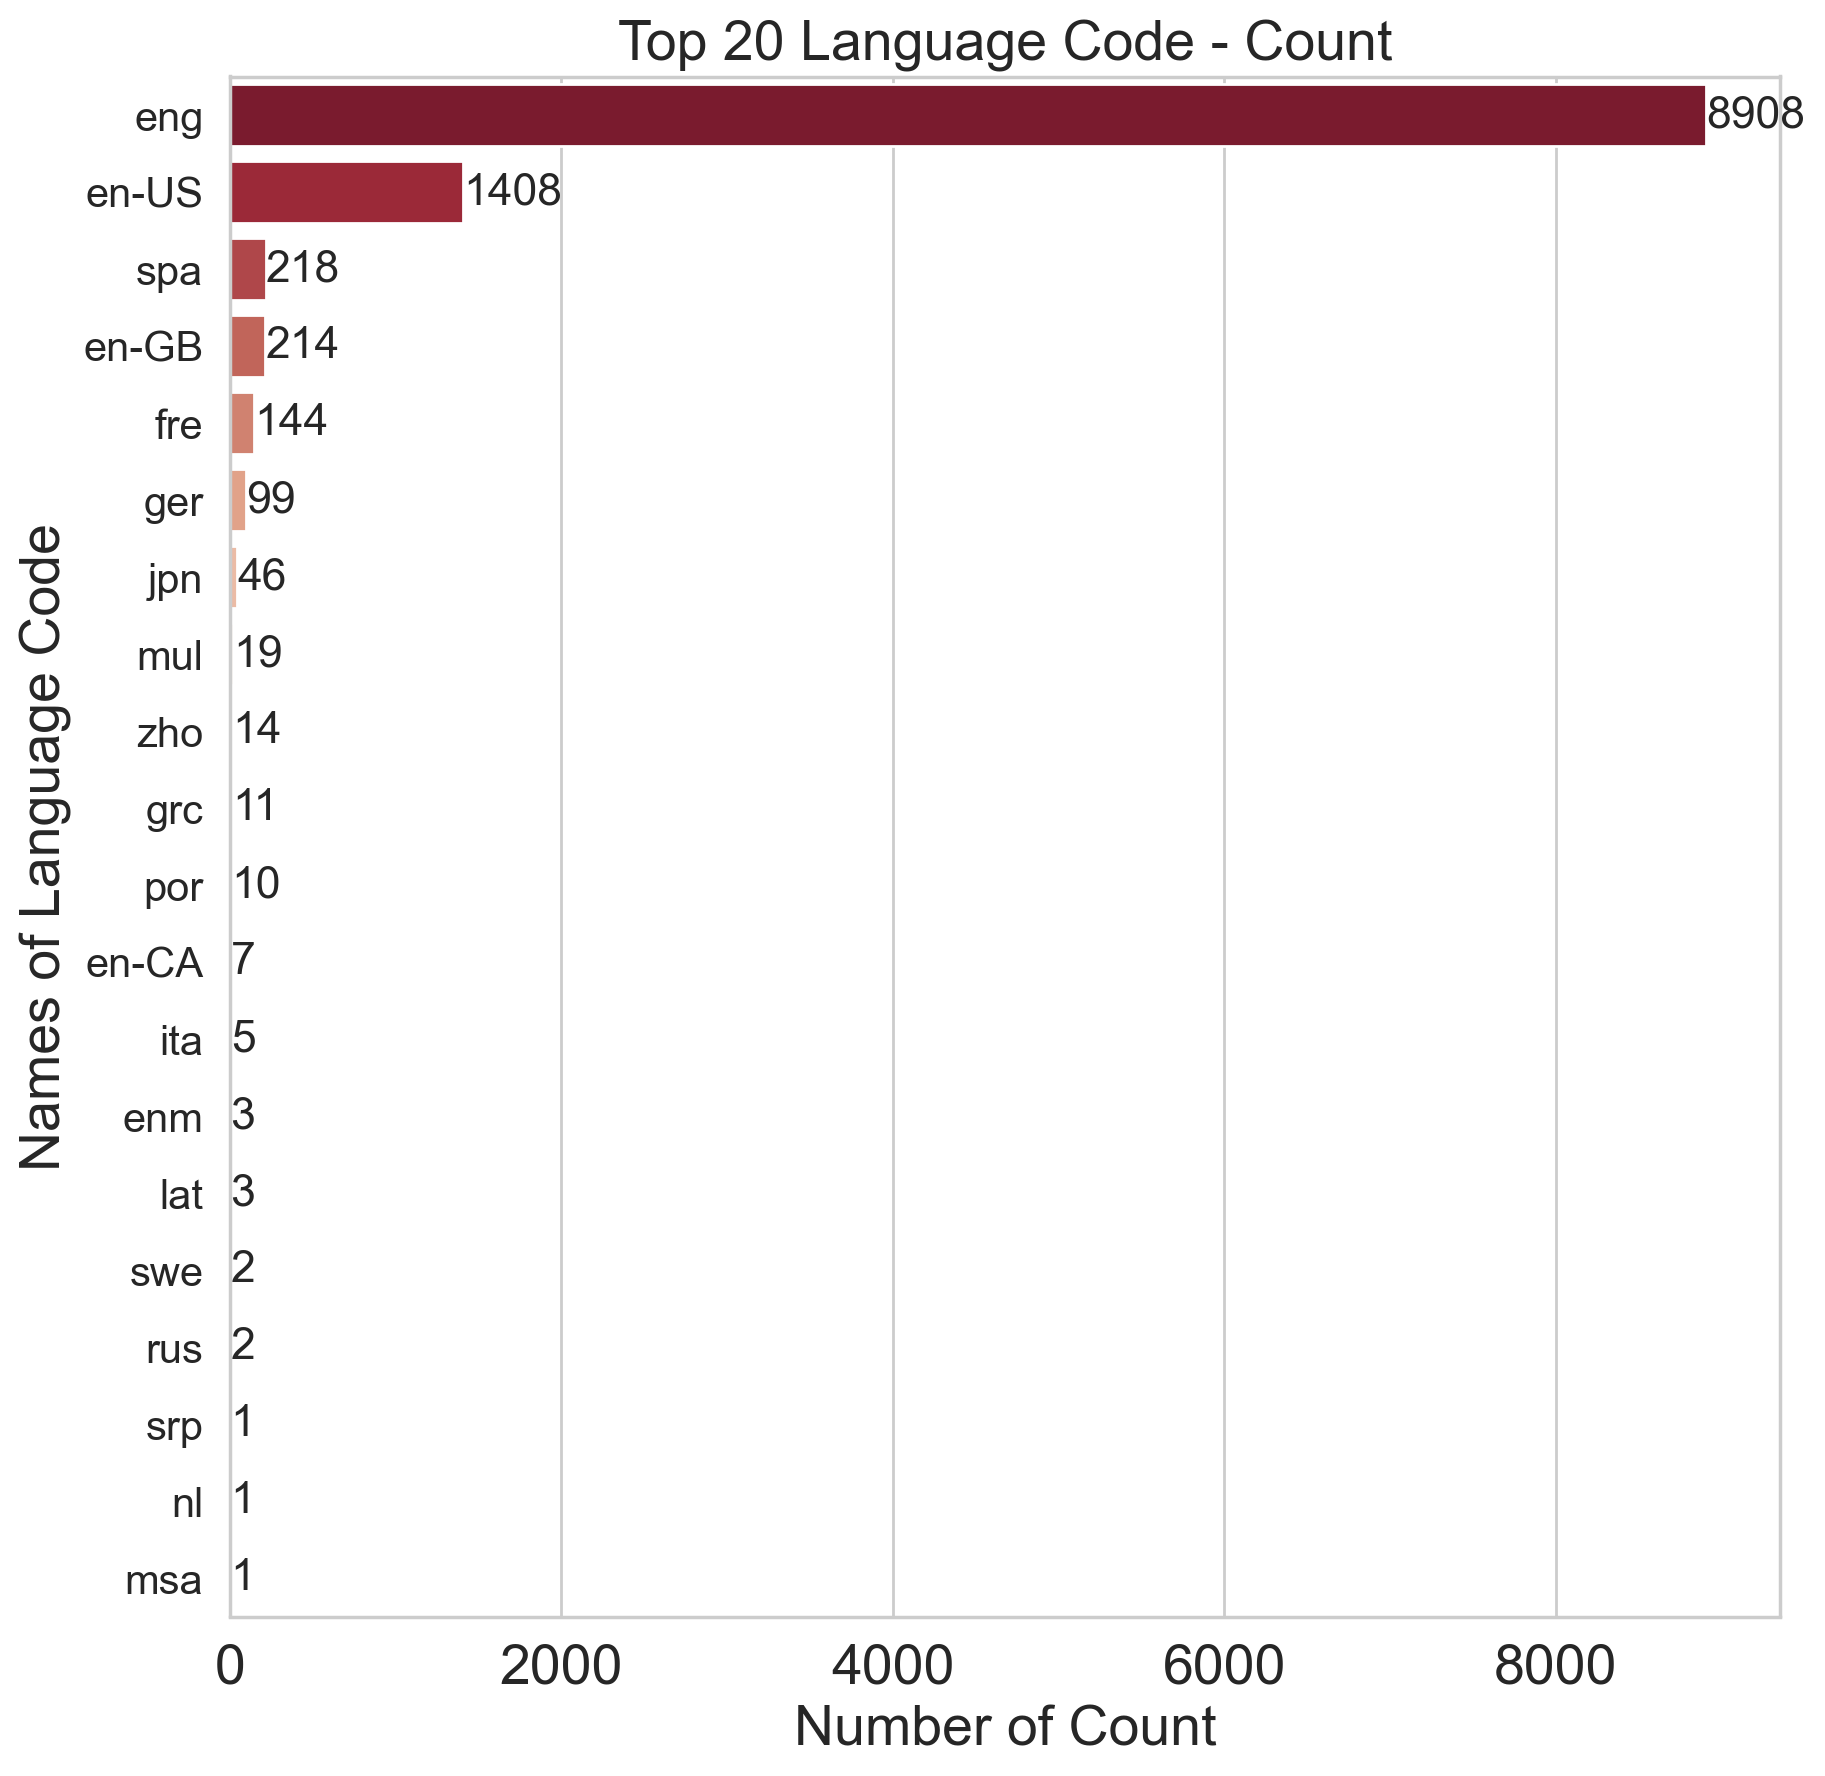

In [19]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(10,10),dpi=200)
Top_20_Lan_Code = df['language_code'].value_counts()[:20]
ax = sns.barplot(x= Top_20_Lan_Code, y= Top_20_Lan_Code.index, palette="RdBu")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of Language Code", fontsize=20)
plt.xlabel("Number of Count", fontsize=20)
plt.title("Top 20 Language Code - Count", fontsize= 20)

# What are the lowest and highest rated books?

> average_rating, ratings_count, text_reviews_count

In [20]:
lowest_rated_book = df['average_rating'].min()
highest_rated_book = df['average_rating'].max()

print("Lowest rated book is: ", lowest_rated_book)
print("Highest rated book is: ", highest_rated_book)

Lowest rated book is:  0.0
Highest rated book is:  5.0


In [21]:
# get the lowest_rated_book
# df[df['average_rating'] == lowest_rated_book]
n = len(df[df['average_rating'] == lowest_rated_book])
print("Number of books with the lowest average rating: ", n)

Number of books with the lowest average rating:  25


In [22]:
# get the highest_rated_book
n = len(df[df['average_rating'] == highest_rated_book])
print("Number of books with the highest average rating: ", n)

Number of books with the highest average rating:  22


In [23]:
df[df['average_rating'] == highest_rated_book]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
624,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0,0198145047,9780198145042,grc,364,0,0,2/22/1922,Oxford University Press USA
786,2560,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5.0,382960226X,9783829602266,eng,83,1,0,9/1/2006,Schirmer Mosel
855,2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.0,0439271711,9780439271714,eng,32,4,1,1/1/2002,Teaching Resources
1243,4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.0,0738511676,9780738511672,eng,128,2,0,3/17/2003,Arcadia Publishing
4125,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,0744002354,9780744002355,eng,128,2,0,3/6/2003,BradyGames
4788,17224,The Diamond Color Meditation: Color Pathway to...,John Diamond,5.0,1890995525,9781890995522,eng,74,5,3,2/1/2006,Square One Publishers
4933,17830,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.0,0533017424,9780533017423,eng,202,4,0,1/1/1975,Vantage Press
5023,18184,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,5.0,0851621813,9780851621814,eng,96,1,0,6/1/2004,Boosey & Hawkes Inc
5474,19786,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.0,0563388692,9780563388692,eng,2,3,0,4/1/1996,BBC Physical Audio
5476,19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.0,0563388323,9780563388326,eng,2,2,0,10/2/1995,BBC Physical Audio


> 2 books have 5.0 as rating, bu with rating_count as 0.  
> 22 of 5.0 rated books all with a fewer numbder of rating.

## Bayesian average: rating and rating counts

The Bayesian average can minimize bias that comes from the highest rated books from a fewer number of ratings.  
How to calculate Bayesian average for each book?  

![Bayesian_average_equation](https://wikimedia.org/api/rest_v1/media/math/render/svg/061e8b71312618ff414a60ab575232c9b6a878b4)

where 
**C(float)** Constant representing the significance of the prior (Empirical Analysis. The bigger C is, the higher the number of reviews required to “get away from m”.).  
**m(float)** represents our prior mean (average mean rating across all books), Global average rating.  
and **n(int))** Number of ratings for the book.   
Let's make C be the average number of ratings for a given movie.

In [24]:
# List of columns want to select
columns_to_use = ["bookID", "average_rating", "ratings_count"]

# Creating a new DataFrame with selected columns
book_rating_stats = df[columns_to_use].copy()

In [25]:
book_rating_stats

,bookID,average_rating,ratings_count
0,1,4.57,2095690
1,2,4.49,2153167
2,4,4.42,6333
3,5,4.56,2339585
4,8,4.78,41428
...,...,...,...
11118,45631,4.06,156
11119,45633,4.08,783
11120,45634,3.96,820
11121,45639,3.72,769


In [26]:
# I think this is the global rating.
# https://sasarun.medium.com/balancing-average-ratings-for-product-search-the-power-of-bayesian-average-for-trustworthy-edb870917eca
C = book_rating_stats['ratings_count'].mean()
m = book_rating_stats['average_rating'].mean()

print(f"Average number of ratings for a given book: {C:.2f}")
print(f"Global average rating is: {m:.2f}")

# I feel here 10 is a resonable value
def bayesian_average(row):
    avg = row['average_rating']
    n = row['ratings_count']
    bayesian_avg = (10*m + avg * n) / (10 + n)
    return round(bayesian_avg, 3)

Average number of ratings for a given book: 17942.85
Global average rating is: 3.93


In [27]:
# Apply the function to each row to calculate Bayesian average for each book
df['bayesian_average'] = book_rating_stats.apply(bayesian_average, axis=1)
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,bayesian_average
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,4.570
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,4.490
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,4.419
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,4.560
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,4.780
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,4.052
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books,4.078
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books,3.960
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco,3.723


# What is the most popular book?

## get the top 10 popular books by rating_count

In [28]:
top_10_popular_books_most_rated = df.sort_values(by=["ratings_count"], ascending=False).head(10)
top_10_popular_books_most_rated

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,bayesian_average
10336,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,501,4597666,94265,9/6/2006,Little Brown and Company,3.59
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,8/15/2002,Houghton Mifflin,4.27
1462,5107,The Catcher in the Rye,J.D. Salinger,3.80,0316769177,9780316769174,eng,277,2457092,43499,1/30/2001,Back Bay Books,3.80
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793,eng,736,2418736,21303,4/1/2006,Pocket Books,3.89
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,4.56
4415,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780439064866,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.,4.42
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,4.49
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt,4.36
2114,7613,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl,3.93,0452284244,9780452284241,eng,122,2111750,29677,5/6/2003,NAL,3.93
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,4.57


Text(0.5, 1.0, 'Top 10 Books - Most Rated')

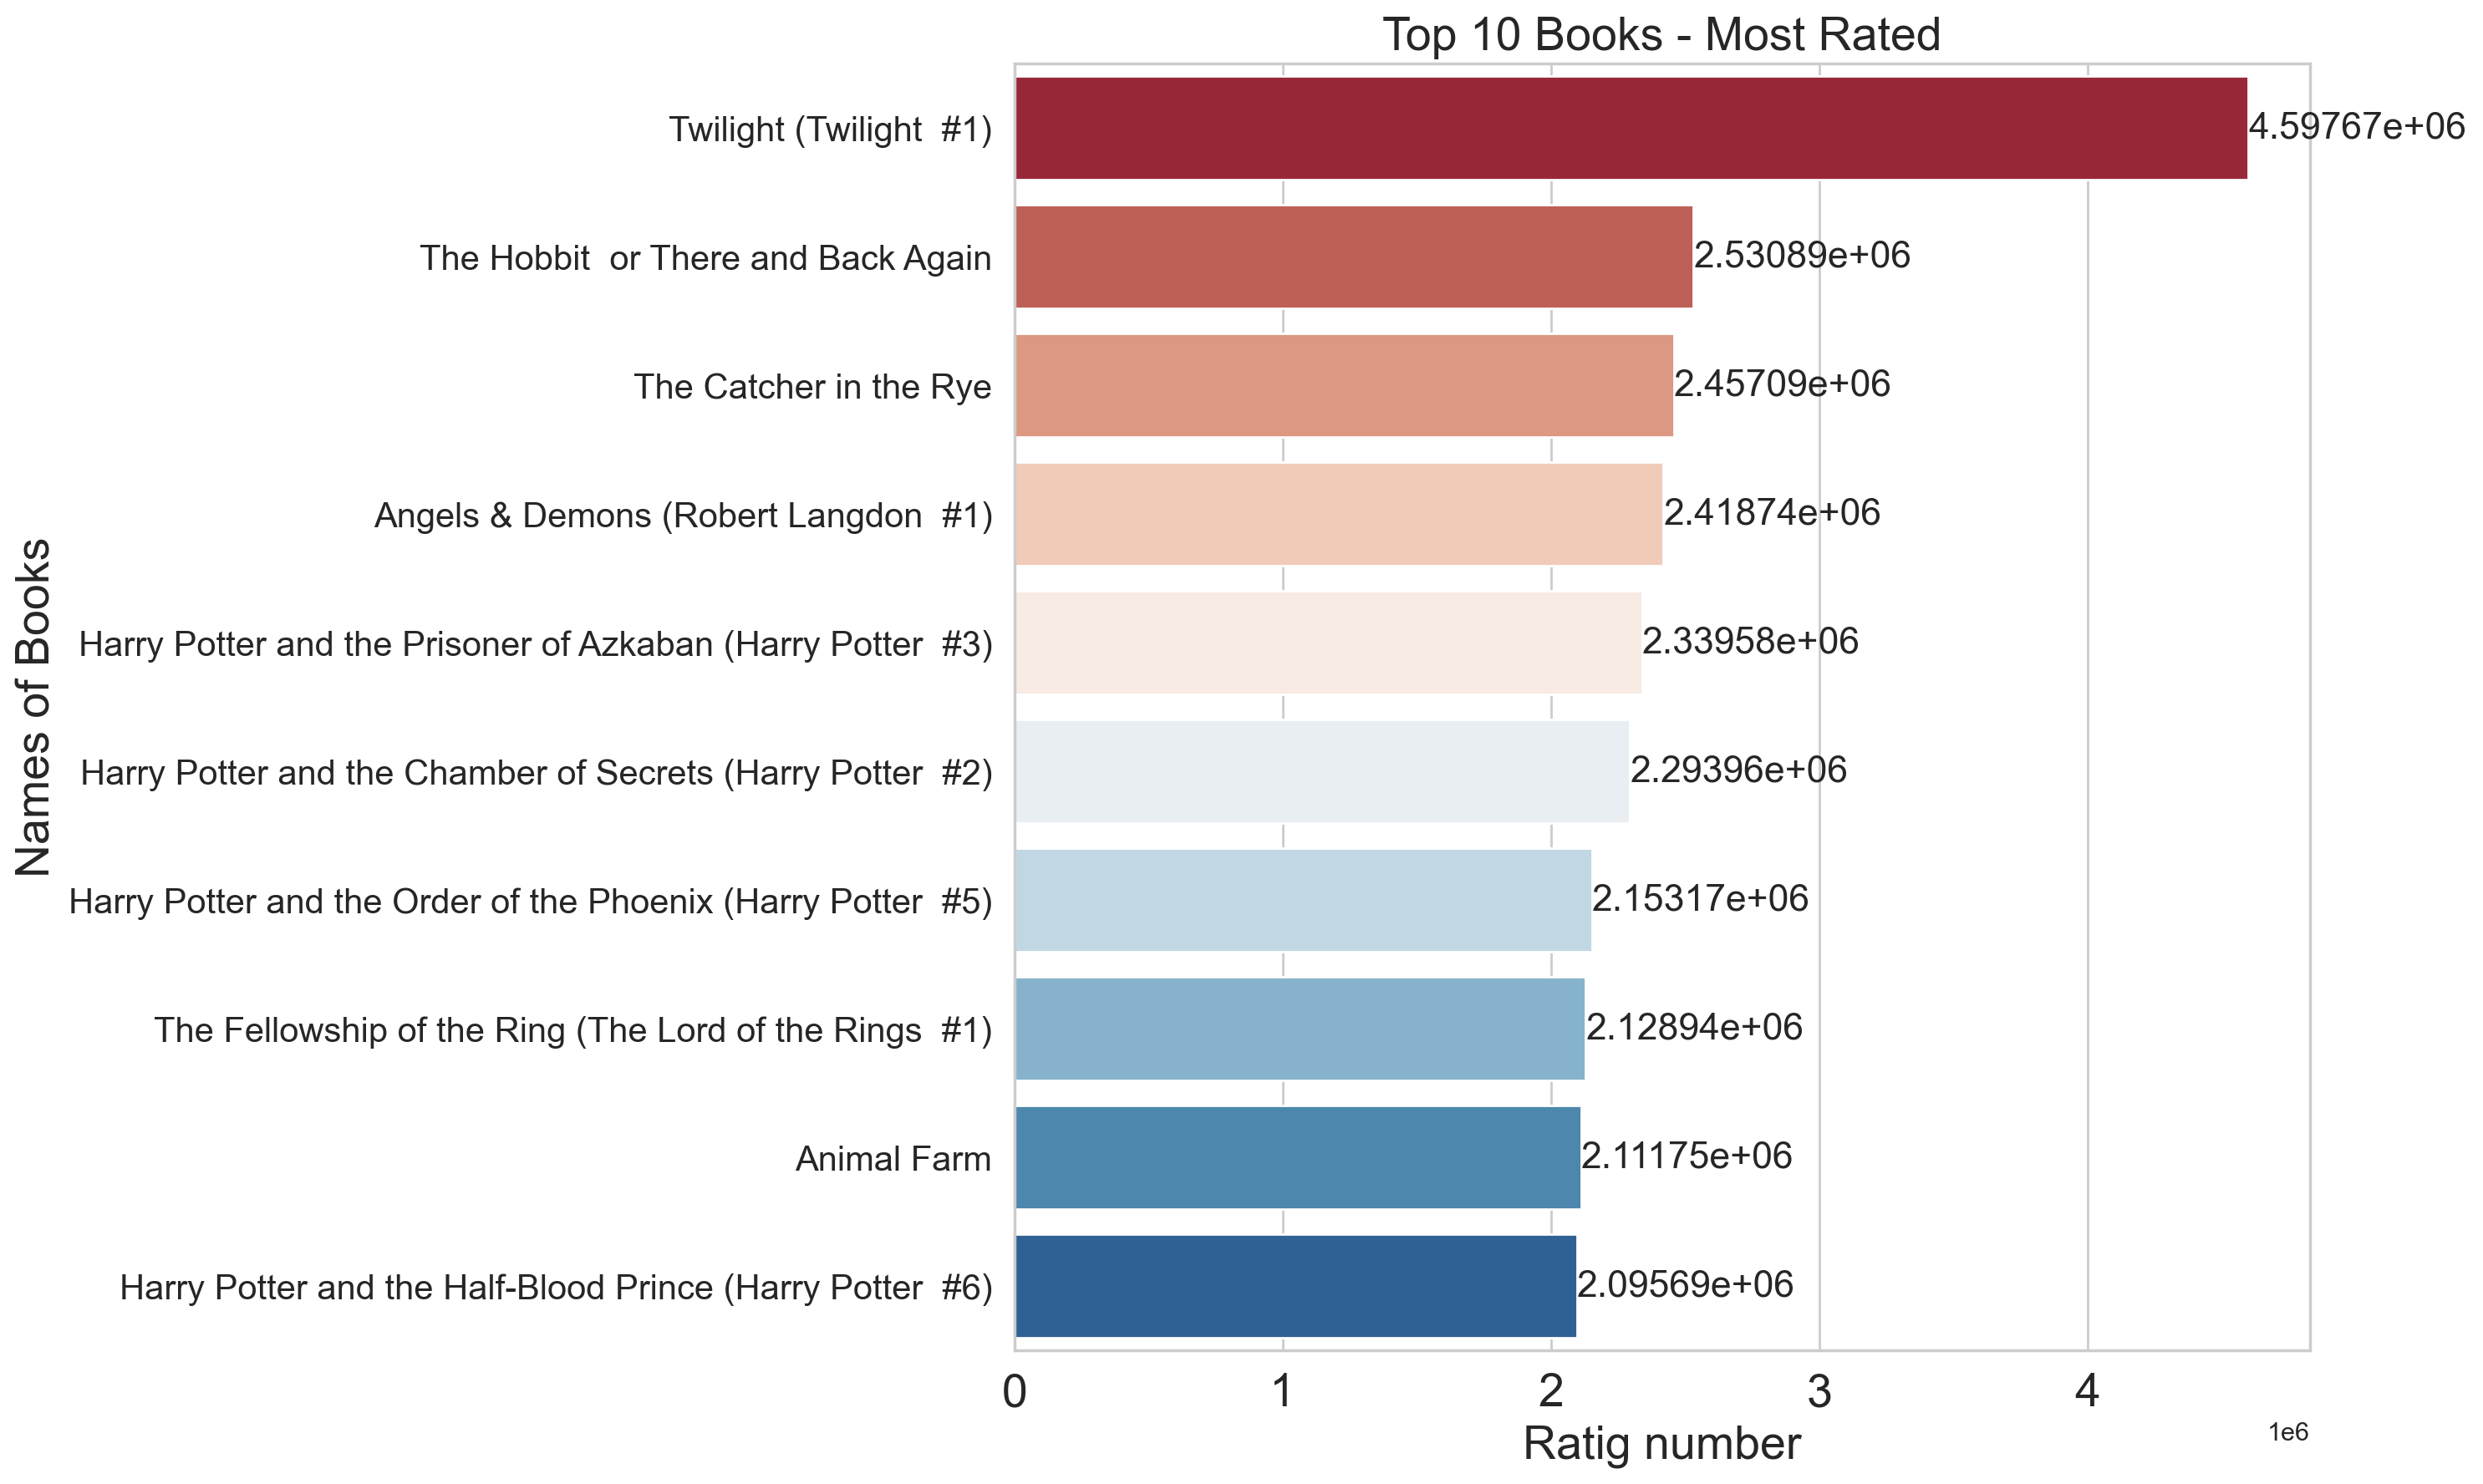

In [33]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(10,10),dpi=200)
ax = sns.barplot(y= "title", x="ratings_count" , 
                 data = top_10_popular_books_most_rated,palette="RdBu")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of Books", fontsize=20)
plt.xlabel("Ratig number", fontsize=20)
plt.title("Top 10 Books - Most Rated", fontsize= 20)

In [35]:
## get the top 10 popular book by Bayesian average
top_10_popular_books_high_bayesian_avg = df.sort_values(by=["bayesian_average"], ascending=False).head(10)
top_10_popular_books_high_bayesian_avg

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,bayesian_average,rating_count_prodect
6587,24812,The Complete Calvin and Hobbes,Bill Watterson,4.82,0740748475,9780740748479,eng,1456,32213,930,9/6/2005,Andrews McMeel Publishing,4.820,155266.66
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,4.780,198025.84
6589,24814,It's a Magical World (Calvin and Hobbes #11),Bill Watterson,4.76,0836221362,9780836221367,eng,176,23875,303,9/1/1996,Andrews McMeel Publishing,4.760,113645.00
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic,4.730,133584.66
6590,24816,Homicidal Psycho Jungle Cat (Calvin and Hobbes...,Bill Watterson,4.72,0836217691,9780836217698,eng,176,15365,290,9/6/1994,Andrews McMeel Publishing,4.719,72522.80
6593,24820,Calvin and Hobbes: Sunday Pages 1985-1995: An ...,Bill Watterson,4.71,0740721356,9780740721359,eng,96,3613,85,9/17/2001,Andrews McMeel Publishing,4.708,17017.23
5614,20749,Study Bible: NIV,Anonymous,4.70,0310929555,9780310929550,eng,2198,4166,186,10/1/2002,Zondervan Publishing House,4.698,19580.20
6497,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,039306011X,9780393060119,eng,6576,1338,81,10/17/2004,W. W. Norton Company,4.694,6288.60
6591,24818,The Days Are Just Packed,Bill Watterson,4.69,0836217357,9780836217353,eng,176,20308,244,9/1/1993,Andrews McMeel Publishing,4.690,95244.52
10937,44826,The Price of the Ticket: Collected Nonfiction ...,James Baldwin,4.70,0312643063,9780312643065,eng,712,404,30,9/15/1985,St. Martin's Press,4.681,1898.80


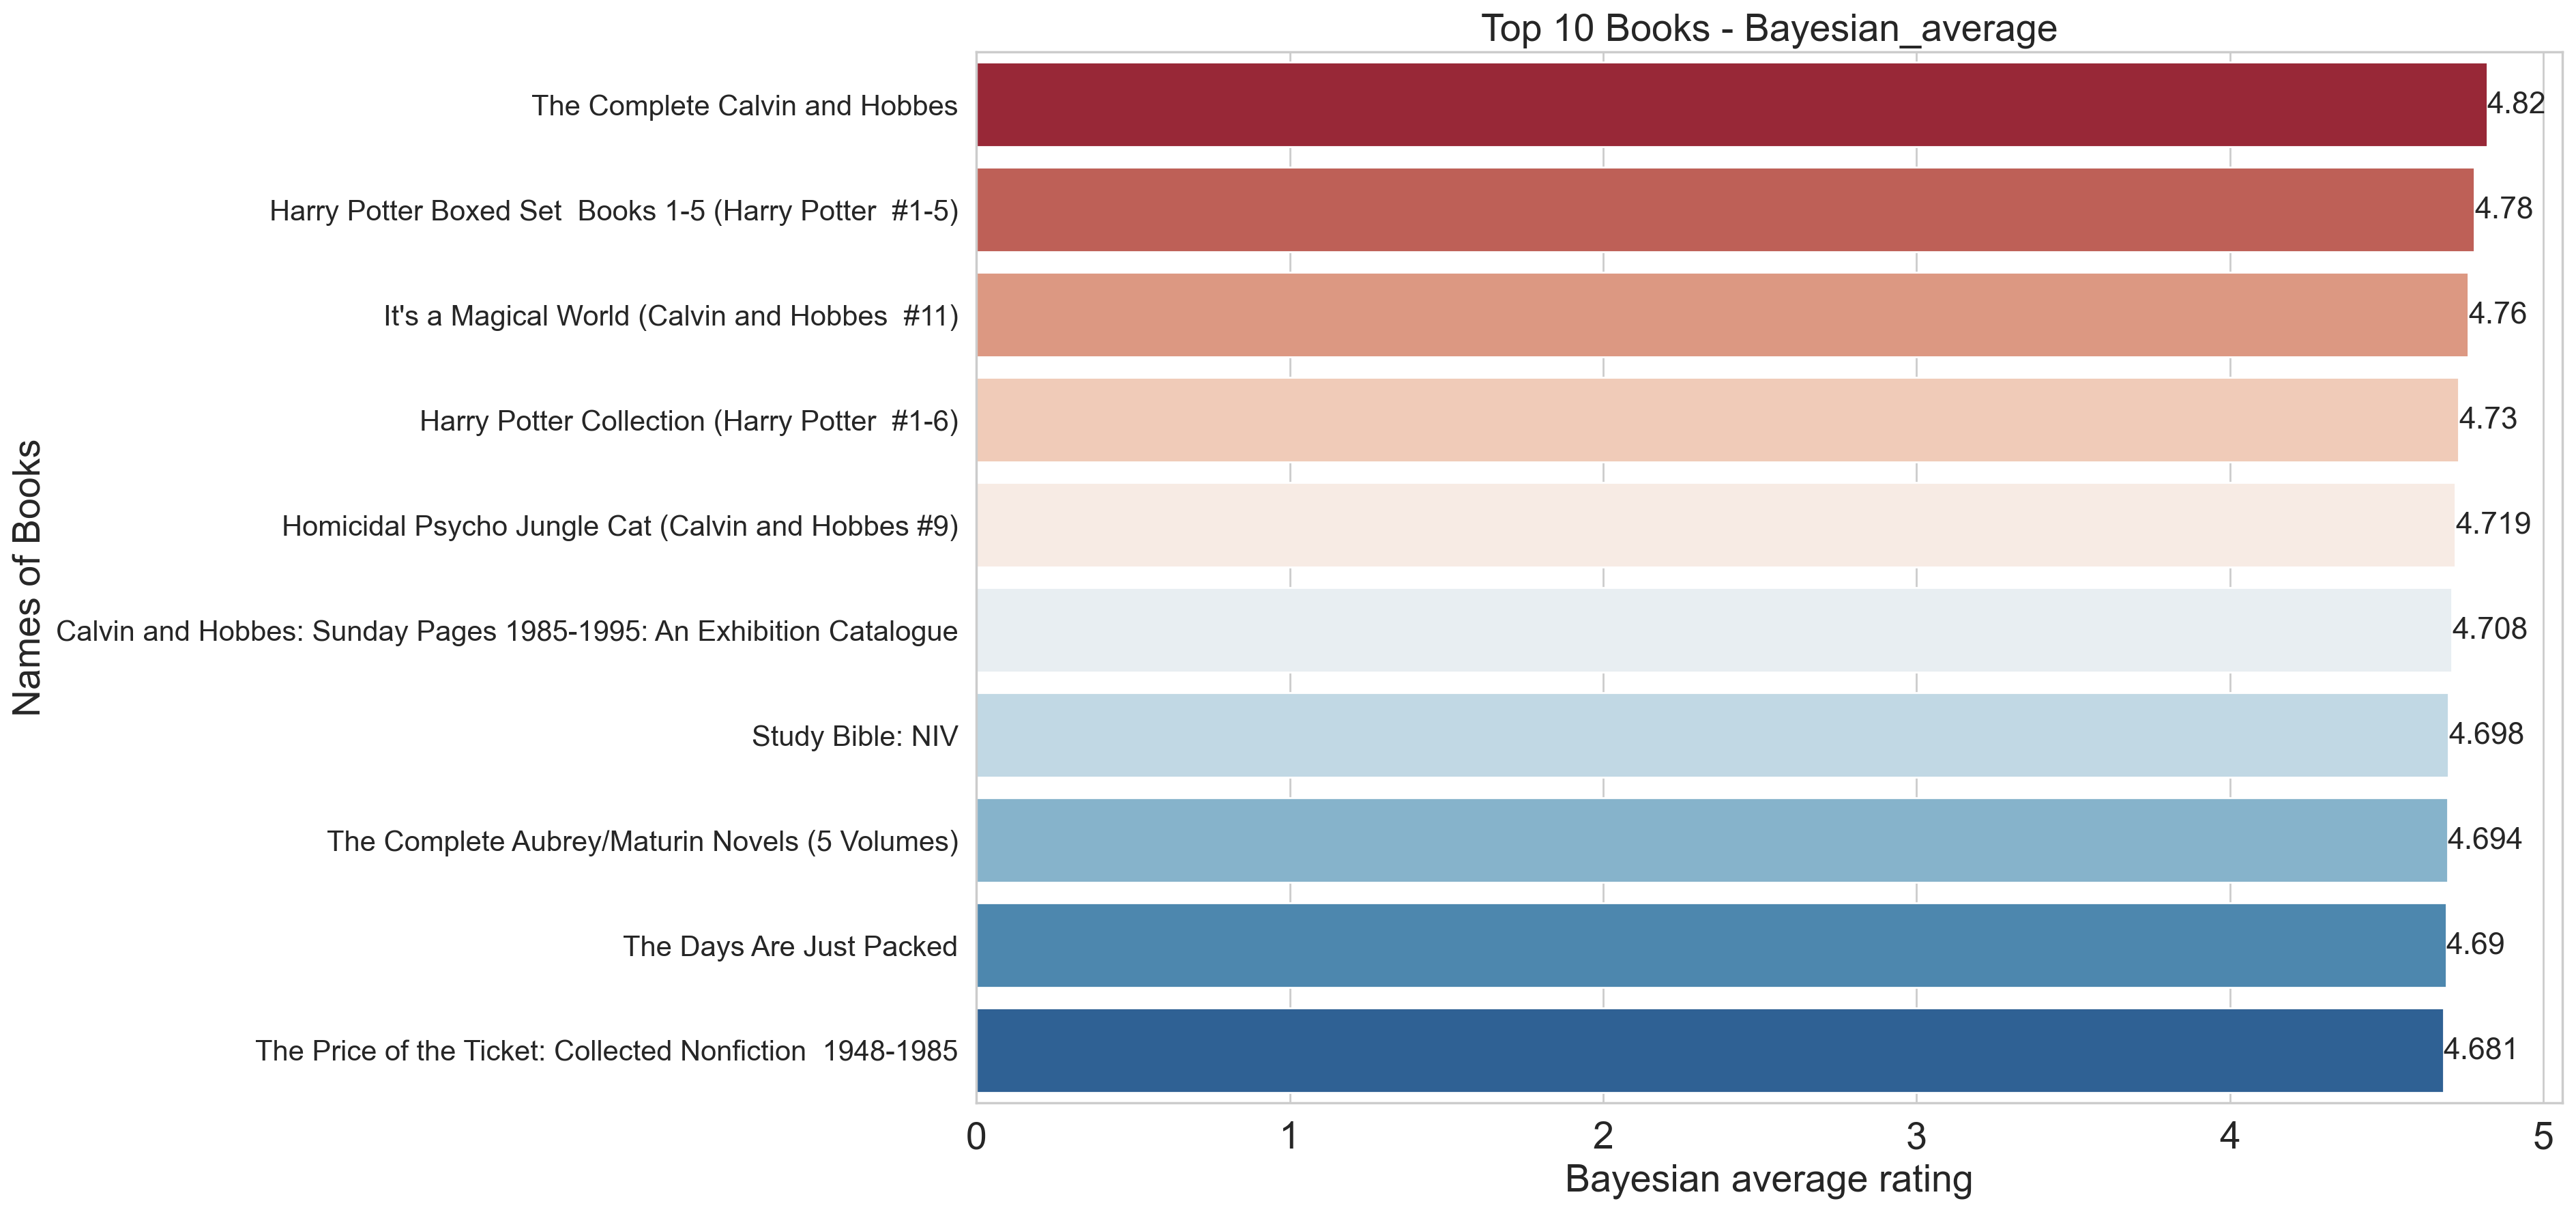

In [62]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(15,10),dpi=200)
ax = sns.barplot(y= "title", x="bayesian_average" , 
                 data = top_10_popular_books_high_bayesian_avg,palette="RdBu")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of Books", fontsize=20)
plt.xlabel("Bayesian average rating", fontsize=20)
plt.title("Top 10 Books - Bayesian_average", fontsize= 20)
plt.show()

In [37]:
names_of_top_10_popular_books_high_bayesian_avg = top_10_popular_books_high_bayesian_avg["title"]
names_of_top_10_popular_books_high_bayesian_avg

6587                        The Complete Calvin and Hobbes
4        Harry Potter Boxed Set  Books 1-5 (Harry Potte...
6589         It's a Magical World (Calvin and Hobbes  #11)
6             Harry Potter Collection (Harry Potter  #1-6)
6590     Homicidal Psycho Jungle Cat (Calvin and Hobbes...
6593     Calvin and Hobbes: Sunday Pages 1985-1995: An ...
5614                                      Study Bible: NIV
6497        The Complete Aubrey/Maturin Novels (5 Volumes)
6591                              The Days Are Just Packed
10937    The Price of the Ticket: Collected Nonfiction ...
Name: title, dtype: object

In [38]:
# create new feature
df["rating_count_prodect"] = df["average_rating"]*df["ratings_count"]
top_10_popular_books_high_rxc = df.sort_values(by=["rating_count_prodect"], ascending=False).head(10)
top_10_popular_books_high_rxc

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,bayesian_average,rating_count_prodect
10336,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,501,4597666,94265,9/6/2006,Little Brown and Company,3.59,16505620.94
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,8/15/2002,Houghton Mifflin,4.27,10806917.38
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,4.56,10668507.60
4415,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780439064866,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.,4.42,10139316.46
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,4.49,9667719.83
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,4.57,9577303.30
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793,eng,736,2418736,21303,4/1/2006,Pocket Books,3.89,9408883.04
1462,5107,The Catcher in the Rye,J.D. Salinger,3.80,0316769177,9780316769174,eng,277,2457092,43499,1/30/2001,Back Bay Books,3.80,9336949.60
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt,4.36,9282195.84
2114,7613,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl,3.93,0452284244,9780452284241,eng,122,2111750,29677,5/6/2003,NAL,3.93,8299177.50


In [39]:
names_of_top_10_popular_books_high_rxc = top_10_popular_books_high_bayesian_avg["title"]
names_of_top_10_popular_books_high_rxc

6587                        The Complete Calvin and Hobbes
4        Harry Potter Boxed Set  Books 1-5 (Harry Potte...
6589         It's a Magical World (Calvin and Hobbes  #11)
6             Harry Potter Collection (Harry Potter  #1-6)
6590     Homicidal Psycho Jungle Cat (Calvin and Hobbes...
6593     Calvin and Hobbes: Sunday Pages 1985-1995: An ...
5614                                      Study Bible: NIV
6497        The Complete Aubrey/Maturin Novels (5 Volumes)
6591                              The Days Are Just Packed
10937    The Price of the Ticket: Collected Nonfiction ...
Name: title, dtype: object

Text(0.5, 1.0, 'Top 10 Books - rating_count_prodect')

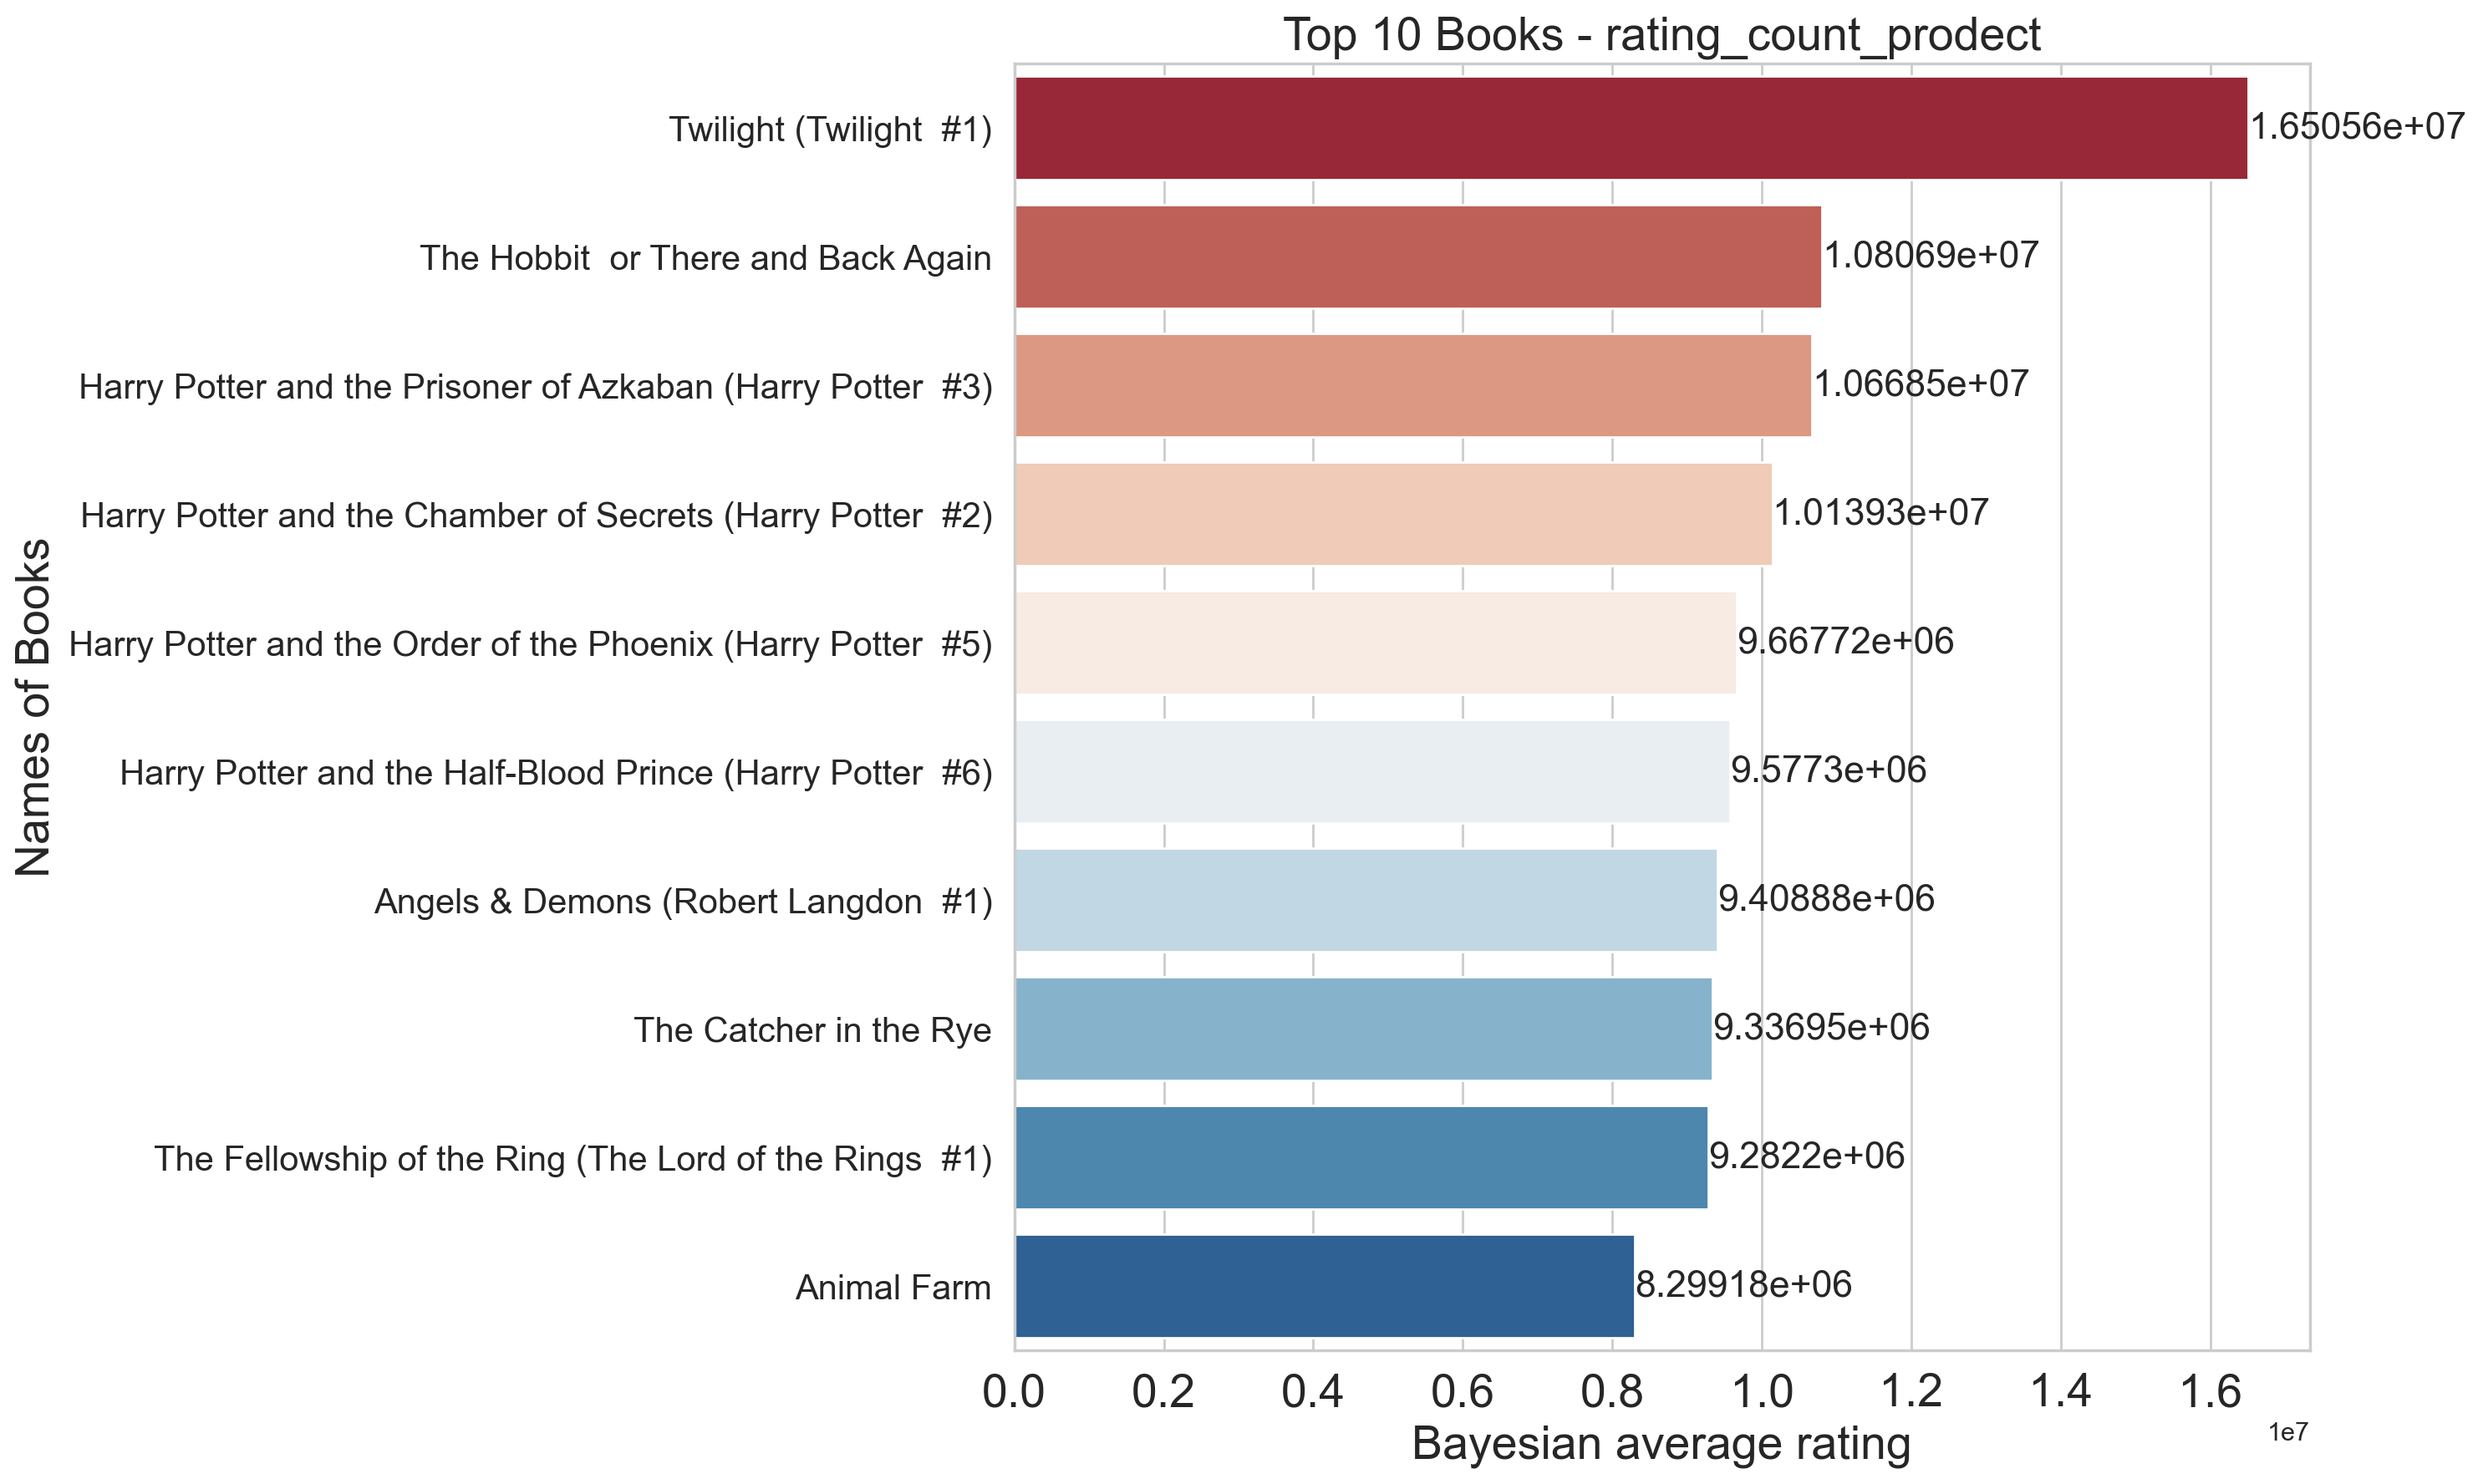

In [40]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(10,10),dpi=200)
ax = sns.barplot(y= "title", x="rating_count_prodect" , 
                 data = top_10_popular_books_high_rxc,palette="RdBu")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of Books", fontsize=20)
plt.xlabel("Bayesian average rating", fontsize=20)
plt.title("Top 10 Books - rating_count_prodect", fontsize= 20)

# Build a non-ml based search engine

In [41]:
# to search the title
import re
def clean_title(title):
    # removes all characterst not letters or digits or space(\s)
    # sub: replace substrings that match a specified pattern
    return re.sub("[^a-zA-Z0-9\s]","",title)

In [42]:
# create a new column named "clclean_title"
df["cleaned_title"] = df["title"].apply(clean_title)

1. prepare documents  
   convert title into sets of number, search effectively. convert all titles into unique term
2. Inverse Document Frequency ()  
   find the title that is unique  
   how: reward low frequency word and penalize popular word, log expression, reduced function    

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize the object
# ngran_range means not only check 1 word but also check 2 words
vectorizer = TfidfVectorizer(ngram_range = (1,2))
# transfer a collection of text data (titles) into a matrix of TF-IDF features
# tfidf is a sparse matrix (2d matrix with a lot of zero).
tfidf = vectorizer.fit_transform(df['cleaned_title'])

In [58]:
# compare similarity
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

#def search(title):
title = "harry potter"
title = clean_title(title)
query_vec = vectorizer.transform([title])
# The transform() method of the vectorizer expects an iterable containing the text data to transform. 
# Even if you have only one sample, it still needs to be passed as an iterable
query_vec

<1x42830 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [45]:
# tfidf is vectorized form of the documents
# flatten() is convert the output of ccosine_similarity into a 1-d array
similarity = cosine_similarity(query_vec, tfidf).flatten()
similarity

array([0.73569445, 0.69035709, 0.70304891, ..., 0.        , 0.        ,
       0.        ])

In [46]:
import ipywidgets as widgets
from IPython.display import display

# Search Engine

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2))

tfidf = vectorizer.fit_transform(df["cleaned_title"])

In [59]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def search(title):
    title = clean_title(title)
    query_vec = vectorizer.transform([title])
    similarity = cosine_similarity(query_vec, tfidf).flatten()
    indices = np.argpartition(similarity, -10)[-10:]
    results = df.iloc[indices].iloc[::-1]
    
    return results

In [60]:
import ipywidgets as widgets
from IPython.display import display

book_input = widgets.Text(
    value='Animal farm',
    description='Book Title:',
    disabled=False
)
book_list = widgets.Output()

def on_type(data):
    with book_list:
        book_list.clear_output()
        title = data["new"]
        if len(title) > 10:
            display(search(title))

book_input.observe(on_type, names='value')


display(book_input, book_list)

Text(value='Animal farm', description='Book Title:')

Output()